# Project 3 : Web APIs & NLP
----------

## Contents:
### Part 3 Preprocessing and Modeling

1. [Importing Libraries](#1.-Importing-Libraries)
2. [Importing Data](#2.-Importing-Data)
3. [Feature Engineering](#3.-Feature-Engineering)
4. [Model Preparation](#4.-Model-Preparation)
5. [Final Model Insights](#5.-Final-Model-Insights)
6. [Conclusion](#6.-Conclusion)
7. [Recommendations](#7.-Recommendations)
8. [Limitations & Improvement](#8.-Limitations-&-Improvement)
9. [References](#9.-References)
--------

## 1. Importing Libraries

In [3749]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, \
                            accuracy_score, precision_score, recall_score, f1_score

from prettytable import PrettyTable

# Display full output 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

## 2. Importing Data

In [3750]:
# Read in combine csv file

df_combine = pd.read_csv('../datasets/combine_sub.csv', keep_default_na = False)

In [3751]:
# Check the first 5 rows of combine df

df_combine.head()

,index,subreddit,title,selftext,content,content_length,content_word_count,content_token_lemma,content_token_stem
0,1,aliens,would the discovery of ultra advanced intelligent alien life shake the anthropocentric views of religious people and spiritualists alike,i d like to have a discussion on this while i know that aliens existing wouldn t automatically disprove god it for sure as hell would shake up the earth centric perspective people have and humanity s self importance thoughts,would the discovery of ultra advanced intelligent alien life shake the anthropocentric views of religious people and spiritualists alike i d like to have a discussion on this while i know that aliens existing wouldn t automatically disprove god it for sure as hell would shake up the earth centric perspective people have and humanity s self importance thoughts,366,59,would the discovery of ultra advanced intelligent alien life shake the anthropocentric view of religious people and spiritualist alike i d like to have a discussion on this while i know that alien existing wouldn t automatically disprove god it for sure a hell would shake up the earth centric perspective people have and humanity s self importance thought,would the discoveri of ultra advanc intellig alien life shake the anthropocentr view of religi peopl and spiritualist alik i d like to have a discuss on thi while i know that alien exist wouldn t automat disprov god it for sure as hell would shake up the earth centric perspect peopl have and human s self import thought
1,2,aliens,the remarkable ufo encounter incident by british policeman alan godfrey,,the remarkable ufo encounter incident by british policeman alan godfrey,72,10,the remarkable ufo encounter incident by british policeman alan godfrey,the remark ufo encount incid by british policeman alan godfrey
2,4,aliens,need documentary and book recommendations,recommendations about aliens being hostile evil having nefarious agenda etc i don t buy this claims they want to help humanity or are good i think i finally cracked through the matrix,need documentary and book recommendations recommendations about aliens being hostile evil having nefarious agenda etc i don t buy this claims they want to help humanity or are good i think i finally cracked through the matrix,230,37,need documentary and book recommendation recommendation about alien being hostile evil having nefarious agenda etc i don t buy this claim they want to help humanity or are good i think i finally cracked through the matrix,need documentari and book recommend recommend about alien be hostil evil have nefari agenda etc i don t buy thi claim they want to help human or are good i think i final crack through the matrix
3,5,aliens,giant snakes do exist,,giant snakes do exist,22,4,giant snake do exist,giant snake do exist
4,6,aliens,if ufo s are future humans which country are they are they a military branch or a police force or something else,to answer the question look at the whole ufo field and interpret it all as if its future humans so rendlesham year disabling of nukes havanna syndrome abductions etc,if ufo s are future humans which country are they are they a military branch or a police force or something else to answer the question look at the whole ufo field and interpret it all as if its future humans so rendlesham year disabling of nukes havanna syndrome abductions etc,293,51,if ufo s are future human which country are they are they a military branch or a police force or something else to answer the question look at the whole ufo field and interpret it all a if it future human so rendlesham year disabling of nuke havanna syndrome abduction etc,if ufo s are futur human which countri are they are they a militari branch or a polic forc or someth els to answer the question look at the whole ufo field and interpret it all as if it futur human so rendlesham year disabl of nuke havanna syndrom abduct etc


## 3. Feature Engineering

In [3752]:
# Engineer a feature to turn subreddit into a 1/0 column where 1 indicates aliens and 0 indicates space

df_combine['is_aliens'] = [1 if i == 'aliens' else 0 for i in df_combine['subreddit']]

In [3753]:
# Check for unbalanced classes

df_combine['is_aliens'].value_counts(normalize = True)

1    0.505596
0    0.494404
Name: is_aliens, dtype: float64

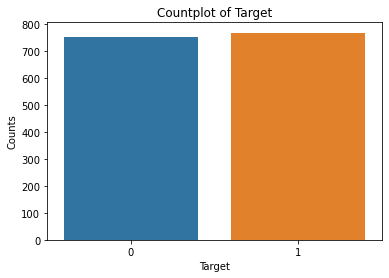

In [3754]:
# Plot countplot of is_aliens column

sns.countplot(data = df_combine, x = 'is_aliens')

plt.title('Countplot of Target')
plt.xlabel('Target')
plt.ylabel('Counts')
plt.savefig('../image/Countplot of Target.png')
plt.show()

<b>Observation</b>: 

1. The data are quite well balanced with almost equal number of 0s and 1s. Standard metrics such as accuracy can be used to evaluate model performance.

## 4. Model Preparation

- <b>Train Test Split</b>

- <b>Define Function</b>

- <b>Modelling</b>
    - Logistic Regression
        - CountVectorizer
        - TF-IDF Vectorizer
    - Multinomial Naive Bayes
        - CountVectorizer
        - TF-IDF Vectorizer
    - Random Forests
        - CountVectorizer
        - TF-IDF Vectorizer


- <b>Model Hyperparameter Tuning</b>

    - Vectorizer Hyperparameters
    - Model Hyperparameters
    - Logistic Regression
        - CountVectorizer
        - TF-IDF Vectorizer
    - Multinomial Naive Bayes
        - CountVectorizer
        - TF-IDF Vectorizer
     - Plot AUC-ROC Curve

### 4.1 Train Test Split

In [3755]:
# Create our feature matrix (X) and target vector (y) from combine dataframe

X = df_combine['content_token_lemma']
y = df_combine['is_aliens']

In [3756]:
# Perform a split of our X and y 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42, stratify = y)

In [3757]:
# Baseline

y_test.value_counts(normalize = True)

1    0.506579
0    0.493421
Name: is_aliens, dtype: float64

<b>Observation</b>: 

1. In order to have something to compare our model against, we will use the normalized value of y, or the percentage of y within our target. This represents the simplest model we can use.
2. In this case, assigning a post randomly will give us a 50.6% accuracy of classifying it correctly, which will be our baseline accuracy in order to evaluate if our model is better than a null model.
4. Accuracy and F1-score will be our main metrics here, given that we're not too particularly concerned about minimizing either false negatives and false positives. Ideally we'd like to minimize both as far as possible.

### 4.2 Define Function

In [3758]:
# Instantiate vectorizers

vectorizers = {'cvec': CountVectorizer(stop_words = 'english'),
               'tvec': TfidfVectorizer(stop_words = 'english')}

In [3759]:
# Instiantiate models

models = {'logreg': LogisticRegression(random_state=42),
          'nb': MultinomialNB(),
          'rf': RandomForestClassifier(random_state=42)}

In [3760]:
# Create a PrettyTable to store overall summary of model performance without hyperparameter tuning

summary = PrettyTable(['Model', 'Vectorizer', 'Train Score', 'Test Score', 'ROC', 'Precision', 'Recall', 'F1_score'])


# Create a PrettyTable to store overall summary of model performance with hyperparameter tuning

summary_tuning = PrettyTable(['Model', 'Vectorizer', 'Train Score', 'Test Score', 'ROC', 'Precision', 'Recall', 'F1_score'])

In [3761]:
# Define a function to run model -- input vectorizer and model

def run_model(vec, model, title, vec_params = {}, model_params = {}, grid_search = False):
        
    # Create a PrettyTable for individual model
    indv = PrettyTable(['Model', 'Vectorizer', 'Train Score', 'Test Score', 'ROC', 'Precision', 'Recall', 'F1_score'])
    
    # Set up pipeline with two stages: 
    # 1. Vectorizer (transformer)
    # 2. Model (estimator)
    pipe = Pipeline([(vec, vectorizers[vec]),
                     (model, models[model])])
    
    if grid_search == True:
        model_gs = GridSearchCV(pipe, param_grid = {**vec_params, **model_params}, cv = 10, verbose = 1, n_jobs = -1)
        model_gs.fit(X_train, y_train)
        pipe = model_gs
        
    else:
        pipe.fit(X_train, y_train)
        
    # Get accuracy score for train & test data
    train_score = round(pipe.score(X_train, y_train),4)
    test_score  = round(pipe.score(X_test, y_test),4)
    
    # Get predictions
    y_preds = pipe.predict(X_test)
    
    # Get ROC, Precision, Recall & F1_score
    roc =  round(roc_auc_score(y_test, y_preds),4)
    precision =  round(precision_score(y_test, y_preds),4)
    recall =  round(recall_score(y_test, y_preds),4)
    f_score =  round(f1_score(y_test, y_preds),4)
    
    # Add the model performance to indv PrettyTable
    indv.add_row([models[model], vectorizers[vec], train_score, test_score, roc, precision, recall, f_score])
    display(indv)
    
    # Add the model performance to overall summary PrettyTable
    if grid_search == True:
        summary_tuning.add_row([models[model], vectorizers[vec], train_score, test_score, roc, precision, recall, f_score])
        print("------------------------------------------------------")
        print('\033[1m'+'\033[4m'+"Best Hyperparameter"+'\033[0m'+'\033[0m')
        display(pipe.best_params_)
    
    else:
        summary.add_row([models[model], vectorizers[vec], train_score, test_score, roc, precision, recall, f_score])
        
    # View confusion matrix 
    print("------------------------------------------------------")
    print('\033[1m'+'\033[4m'+"\nConfusion Matrix"+'\033[0m'+'\033[0m')
    plot_confusion_matrix(pipe, X_test, y_test, cmap = 'Blues', values_format = 'd')
    plt.title(title)
    plt.show()
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
    print(f"\nTrue Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}\n")
    print("------------------------------------------------------")
    print('\033[1m'+'\033[4m'+"Classification Report"+'\033[0m'+'\033[0m')
    print(classification_report(y_test, y_preds))

    return pipe

### 4.3 Modelling

#### 4.3.1 Logistic Regression

**Logistic Regression** is considered a standard approach for binary classification. Logistic Regression uses an equation as the representation, very much like Linear Regression. Input values (X) are combined linearly using weights or coefficient values to predict an output value (y). A key difference from Linear Regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value. It is easier to implement, interpret, and very efficient to train. The model coefficients can be interpreted as indicators of feature importance.


The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. Non-linear problems can’t be solved with Logistic Regression. Also, if the number of observations is lesser than the number of features, it may lead to overfitting.

##### a) Logistic Regression with CountVectorizer

Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
LogisticRegression(random_state=42),CountVectorizer(stop_words='english'),0.9897,0.8925,0.8924,0.8856,0.9048,0.8951


------------------------------------------------------

Confusion Matrix


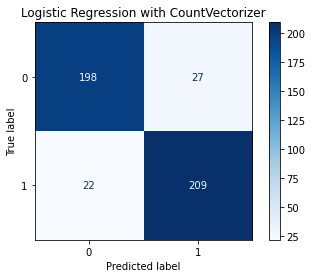


True Negatives: 198
False Positives: 27
False Negatives: 22
True Positives: 209

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       225
           1       0.89      0.90      0.90       231

    accuracy                           0.89       456
   macro avg       0.89      0.89      0.89       456
weighted avg       0.89      0.89      0.89       456



In [3762]:
# Run the model - Logistic Regression with CountVectorizer

logreg_cvec = run_model('cvec', 'logreg', 'Logistic Regression with CountVectorizer')

##### b) Logistic Regression with TF-IDF Vectorizer

Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
LogisticRegression(random_state=42),TfidfVectorizer(stop_words='english'),0.9774,0.9057,0.9052,0.879,0.9437,0.9102


------------------------------------------------------

Confusion Matrix


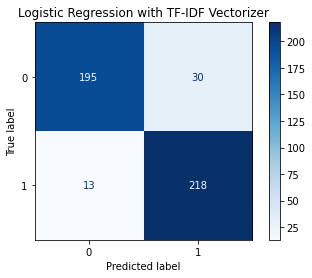


True Negatives: 195
False Positives: 30
False Negatives: 13
True Positives: 218

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       225
           1       0.88      0.94      0.91       231

    accuracy                           0.91       456
   macro avg       0.91      0.91      0.91       456
weighted avg       0.91      0.91      0.91       456



In [3763]:
# Run the model - Logistic Regression with TF-IDF Vectorizer

logreg_tvec = run_model('tvec', 'logreg', 'Logistic Regression with TF-IDF Vectorizer')

<b>Observation<b/> : 
    
1. Based on the above information, I conclude that both **Logistic Regression with CountVectorizer** and **Logistic Regression with TF-IDF Vectorizer** model is slightly overfit to the data but is not a bad model.
2. Here, True Positives(TP) is <mark style="background-color: lightgrey">r/aliens</mark> posts that were correctly classified by our model. True Negatives(TN) are <mark style="background-color: lightgrey">r/space</mark> posts that were correctly classified by our model.
3. Based on the R2 accuracy, Logistic Regression with TF-IDF Vectorizer model R2 accuracy is slightly higher than Logistic Regression with CountVectorizer model. Logistic Regression with CountVectorizer model is able to accurately predict 89.2% of the the test data and 98.9% of the train data based on our text features whereas Logistic Regression with TF-IDF Vectorizer model is able to accurately predict 90.5% of the the test data and 97.7% of the train data based on our text features. Logistic Regression with TF-IDF Vectorizer model is quite good and less overfit.
4. F1-score is the weighted average of Precision and Recall. F1-score takes both false positives and false negatives into account. High F1-score indicate a good Precision and a good Recall score. Based on F1-score, Logistic Regression with TF-IDF Vectorizer is higher than Logistic Regression with CountVectorizer model.
5. CountVectorizer is a way to convert a given set of strings into a frequency representation. TF-IDF Vectorizer means Term Frequency - Inverse Document Frequency that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis. TF-IDF Vectorizer is better than CountVectorizer. 

#### 4.3.2 Multinomial Naive Bayes

**Naive Bayes** is a learning algorithm frequently used in text classification problems. Naive Bayes algorithm is divided into threre types namely **Bernoulli**, **Multinomial** and **Gaussian Naive Bayes**. Bernoulli is a binary algorithm used when the feature is present or not. On the other hand, Multinomial Naive Bayes consider a feature vector where a given term represents the number of times it appears or very often i.e. frequency. At last Gaussian is based on continuous distribution.

Multinomial Naive Bayes is a suitable algorithm to use in our analysis. Multinomial Naive Bayes has low computation cost and work effectively with large datasets. Also, it is easy to implement, fast and accurate method of prediction.

The major limitation of Multinomial Naive Bayes is the assumption of independent predictors. This algorithm assumes that all the attributes are mutually independent. In real life, it is almost impossible that we get a set of predictors which are completely independent. Also, it is only used for textual data classification and cannot be used to predict numeric values.

##### a) Multinomial Naive Bayes with CountVectorizer

Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
MultinomialNB(),CountVectorizer(stop_words='english'),0.9643,0.8969,0.8965,0.877,0.9264,0.9011


------------------------------------------------------

Confusion Matrix


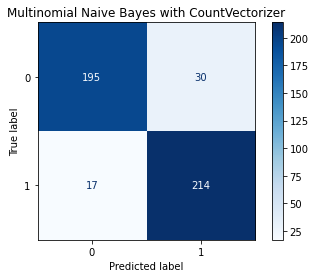


True Negatives: 195
False Positives: 30
False Negatives: 17
True Positives: 214

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       225
           1       0.88      0.93      0.90       231

    accuracy                           0.90       456
   macro avg       0.90      0.90      0.90       456
weighted avg       0.90      0.90      0.90       456



In [3764]:
# Run the model - Multinomial Naive Bayes with CountVectorizer

nb_cvec = run_model('cvec', 'nb', 'Multinomial Naive Bayes with CountVectorizer')

##### b) Multinomial Naive Bayes with TF-IDF Vectorizer

Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
MultinomialNB(),TfidfVectorizer(stop_words='english'),0.9699,0.9013,0.9009,0.8811,0.9307,0.9053


------------------------------------------------------

Confusion Matrix


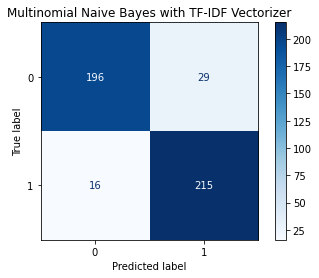


True Negatives: 196
False Positives: 29
False Negatives: 16
True Positives: 215

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       225
           1       0.88      0.93      0.91       231

    accuracy                           0.90       456
   macro avg       0.90      0.90      0.90       456
weighted avg       0.90      0.90      0.90       456



In [3765]:
# Run the model - Multinomial Naive Bayes with TF-IDF Vectorizer

nb_tvec = run_model('tvec', 'nb', 'Multinomial Naive Bayes with TF-IDF Vectorizer')

<b>Observation<b/> : 
    
1. Based on the above information, I conclude that both **Multinomial Naive Bayes with CountVectorizer** and **Multinomial Naive Bayes with TF-IDF Vectorizer** model is slightly overfit to the data but is not a bad model.
2. Based on the R2 accuracy, Multinomial Naive Bayes with CountVectorizer model and Multinomial Naive Bayes with TF-IDF Vectorizer model is only a marginal difference . Multinomial Naive Bayes with CountVectorizer model is able to accurately predict 89.6% of the the test data and 96.4% of the train data based on our text features. Whereas, Multinomial Naive Bayes with TF-IDF Vectorizer model is able to accurately predict only 90.1% of the the test data and 97.0 % of the train data based on our text features. Both model is good and acceptable.
4. Based on F1-score, Multinomial Naive Bayes with TF-IDF Vectorizer is only slightly higher than Multinomial Naive Bayes with CountVectorizer.

#### 4.3.3 Random Forests

**Random Forests** is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. Random Forests reduces overfitting in decision trees and helps to improve the accuracy. Also, it is flexible to both classification and regression problems and works well with both categorical and continuous values. 

The major limitation of Random Forests is it requires much computational power as well as resources as it builds numerous trees to combine their outputs. It also requires much time for training as it combines a lot of decision trees to determine the class. Last but not least, due to the ensemble of decision trees, it suffers interpretability and fails to determine the significance of each variable.

##### a) Random Forests with CountVectorizer

Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
RandomForestClassifier(random_state=42),CountVectorizer(stop_words='english'),1.0,0.8728,0.8717,0.824,0.9524,0.8835


------------------------------------------------------

Confusion Matrix


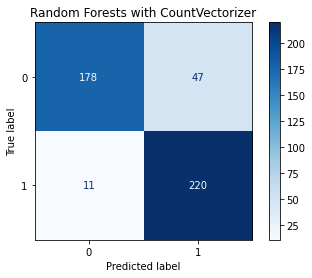


True Negatives: 178
False Positives: 47
False Negatives: 11
True Positives: 220

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       225
           1       0.82      0.95      0.88       231

    accuracy                           0.87       456
   macro avg       0.88      0.87      0.87       456
weighted avg       0.88      0.87      0.87       456



In [3766]:
# Run the model - Random Forests with CountVectorizer

rf_cvec = run_model('cvec', 'rf', 'Random Forests with CountVectorizer')

##### b) Random Forests with TF-IDF Vectorizer

Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
RandomForestClassifier(random_state=42),TfidfVectorizer(stop_words='english'),1.0,0.8728,0.8717,0.824,0.9524,0.8835


------------------------------------------------------

Confusion Matrix


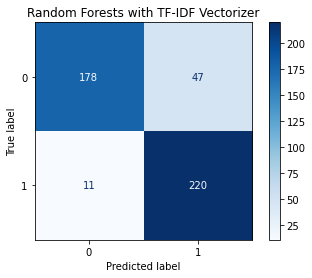


True Negatives: 178
False Positives: 47
False Negatives: 11
True Positives: 220

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       225
           1       0.82      0.95      0.88       231

    accuracy                           0.87       456
   macro avg       0.88      0.87      0.87       456
weighted avg       0.88      0.87      0.87       456



In [3767]:
# Run the model - Random Forests with TF-IDF Vectorizer

rf_tvec = run_model('tvec', 'rf', 'Random Forests with TF-IDF Vectorizer')

<b>Observation<b/> : 
    
1. Based on the above information, I conclude that both **Random Forests with CountVectorizer** and **Random Forests with TF-IDF Vectorizer** model is extreme overfit to the data and is a bad model.
2. Based on the R2 accuracy, Random Forests with CountVectorizer model and Random Forests with TF-IDF Vectorizer model is the same. Both model is able to accurately predict 87.2% of the the test data but 100% of the train data based on our text features, both model are heavily overfitting.
3. Based on F1-score, both model is the same.

In [3768]:
# Print the summary of modelling without hyperparameter tuning

summary

Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
LogisticRegression(random_state=42),CountVectorizer(stop_words='english'),0.9897,0.8925,0.8924,0.8856,0.9048,0.8951
LogisticRegression(random_state=42),TfidfVectorizer(stop_words='english'),0.9774,0.9057,0.9052,0.879,0.9437,0.9102
MultinomialNB(),CountVectorizer(stop_words='english'),0.9643,0.8969,0.8965,0.877,0.9264,0.9011
MultinomialNB(),TfidfVectorizer(stop_words='english'),0.9699,0.9013,0.9009,0.8811,0.9307,0.9053
RandomForestClassifier(random_state=42),CountVectorizer(stop_words='english'),1.0,0.8728,0.8717,0.824,0.9524,0.8835
RandomForestClassifier(random_state=42),TfidfVectorizer(stop_words='english'),1.0,0.8728,0.8717,0.824,0.9524,0.8835


<b>Observation<b/> : 
    
1. Based on the above summary table, all the model R2 accuracy & F1-score is only marginal difference. Model with text vectorized using TF-IDF Vectorizer tends to perform slightly better than CountVectorizer except Random Forests. Hyperparameter tuning (optimization) is an essential aspect of machine learning process of maximizing a model's performance without overfitting or creating too high of a variance. 
2. Random Forest Classifier is the most overfit model and performs the worse on test data than Logistic Regression and Multinomial Naive Bayes. In view of the fact that Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming. Random forests model will be excluded from hyperparameter tuning process.
3. Logistic Regression and Multinomial Naive Bayes is easier to implement, interpret, and very efficient to train for predicting real-time applications. Thus, both model will go through hyperparameter tuning.

### 4.4 Model Hyperparameter Tuning

#### 4.4.1 Vectorizer Hyperparameters

In [3769]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3500, 5000
# Minimum number of documents needed to include token: 1, 2
# Maximum number of documents needed to include token: 80%, 90%
# Check (individual tokens), (individual tokens and 2-grams) and also check (2-grams)

cvec_params = {
    'cvec__max_features' : [2_000, 3_500, 5_000],
    'cvec__min_df' : [1, 2],
    'cvec__max_df' : [0.8, 0.9],
    'cvec__ngram_range': [(1,1), (1,2), (2,2)]
}

In [3770]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3500, 5000
# Minimum number of documents needed to include token: 1, 2
# Maximum number of documents needed to include token: 80%, 90%
# Check (individual tokens), (individual tokens and 2-grams) and also check (2-grams)

tvec_params = {
    'tvec__max_features' : [2_000, 3_500, 5_000],
    'tvec__min_df' : [1, 2],
    'tvec__max_df' : [0.8, 0.9],
    'tvec__ngram_range': [(1,1), (1,2), (2,2)]
}

#### 4.4.2 Model Hyperparameters

In [3771]:
# Search over the following values of hyperparameters:
# Inverse of regularization strength: 0.1, 0.5, 1
    
logreg_params = {
    'logreg__C':[0.1, 0.5, 1]
}

In [3772]:
# Search over the following values of hyperparameters:
# Additive smoothing parameter: 0, 0.25, 0.5
  
nb_params = {
    'nb__alpha': [0.25, 0.5]
}

#### 4.4.3 Logistic Regression

##### a) Logistic Regression with CountVectorizer

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
LogisticRegression(random_state=42),CountVectorizer(stop_words='english'),0.9774,0.8991,0.8992,0.9075,0.8918,0.8996


------------------------------------------------------
Best Hyperparameter


{'cvec__max_df': 0.8,
 'cvec__max_features': 3500,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'logreg__C': 0.5}

------------------------------------------------------

Confusion Matrix


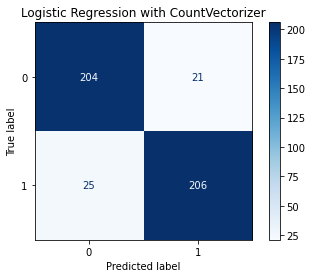


True Negatives: 204
False Positives: 21
False Negatives: 25
True Positives: 206

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       225
           1       0.91      0.89      0.90       231

    accuracy                           0.90       456
   macro avg       0.90      0.90      0.90       456
weighted avg       0.90      0.90      0.90       456



In [3773]:
# Run the model - Logistic Regression with CountVectorizer

logreg_cvec_gs = run_model('cvec', 'logreg', 'Logistic Regression with CountVectorizer', vec_params = cvec_params, model_params = logreg_params, grid_search=True)

##### b) Logistic Regression with TF-IDF Vectorizer

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
LogisticRegression(random_state=42),TfidfVectorizer(stop_words='english'),0.9718,0.9101,0.9096,0.8862,0.9437,0.914


------------------------------------------------------
Best Hyperparameter


{'logreg__C': 1,
 'tvec__max_df': 0.8,
 'tvec__max_features': 2000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

------------------------------------------------------

Confusion Matrix


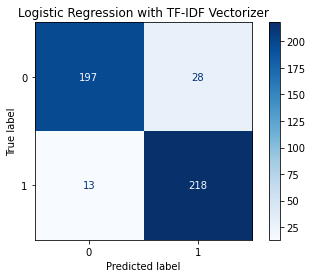


True Negatives: 197
False Positives: 28
False Negatives: 13
True Positives: 218

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       225
           1       0.89      0.94      0.91       231

    accuracy                           0.91       456
   macro avg       0.91      0.91      0.91       456
weighted avg       0.91      0.91      0.91       456



In [3774]:
# Run the model - Logistic Regression with TF-IDF Vectorizer

logreg_tvec_gs = run_model('tvec', 'logreg', 'Logistic Regression with TF-IDF Vectorizer', vec_params = tvec_params, model_params = logreg_params, grid_search=True)

#### 4.4.4 Multinomial Naive Bayes

##### a) Multinomial Naive Bayes with CountVectorizer

Fitting 10 folds for each of 72 candidates, totalling 720 fits


Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
MultinomialNB(),CountVectorizer(stop_words='english'),0.9718,0.8969,0.8965,0.877,0.9264,0.9011


------------------------------------------------------
Best Hyperparameter


{'cvec__max_df': 0.8,
 'cvec__max_features': 3500,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'nb__alpha': 0.25}

------------------------------------------------------

Confusion Matrix


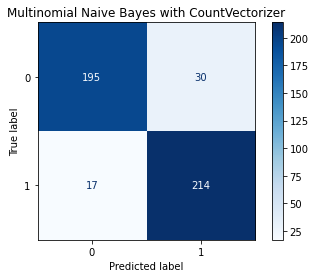


True Negatives: 195
False Positives: 30
False Negatives: 17
True Positives: 214

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       225
           1       0.88      0.93      0.90       231

    accuracy                           0.90       456
   macro avg       0.90      0.90      0.90       456
weighted avg       0.90      0.90      0.90       456



In [3775]:
# Run the model - Multinomial Naive Bayes with CountVectorizer

nb_cvec_gs = run_model('cvec', 'nb', 'Multinomial Naive Bayes with CountVectorizer', vec_params = cvec_params, model_params = nb_params, grid_search=True)

##### b) Multinomial Naive Bayes with TF-IDF Vectorizer

Fitting 10 folds for each of 72 candidates, totalling 720 fits


Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
MultinomialNB(),TfidfVectorizer(stop_words='english'),0.9793,0.8969,0.8966,0.8802,0.9221,0.9006


------------------------------------------------------
Best Hyperparameter


{'nb__alpha': 0.5,
 'tvec__max_df': 0.8,
 'tvec__max_features': 3500,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1)}

------------------------------------------------------

Confusion Matrix


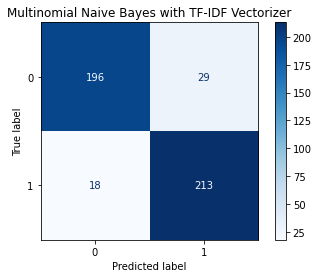


True Negatives: 196
False Positives: 29
False Negatives: 18
True Positives: 213

------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       225
           1       0.88      0.92      0.90       231

    accuracy                           0.90       456
   macro avg       0.90      0.90      0.90       456
weighted avg       0.90      0.90      0.90       456



In [3776]:
# Run the model - Multinomial Naive Bayes with TF-IDF Vectorizer

nb_tvec_gs = run_model('tvec', 'nb', 'Multinomial Naive Bayes with TF-IDF Vectorizer', vec_params = tvec_params, model_params = nb_params, grid_search=True)

In [3777]:
# Print the summary of modelling after hyperparameter tuning

summary_tuning

Model,Vectorizer,Train Score,Test Score,ROC,Precision,Recall,F1_score
LogisticRegression(random_state=42),CountVectorizer(stop_words='english'),0.9774,0.8991,0.8992,0.9075,0.8918,0.8996
LogisticRegression(random_state=42),TfidfVectorizer(stop_words='english'),0.9718,0.9101,0.9096,0.8862,0.9437,0.914
MultinomialNB(),CountVectorizer(stop_words='english'),0.9718,0.8969,0.8965,0.877,0.9264,0.9011
MultinomialNB(),TfidfVectorizer(stop_words='english'),0.9793,0.8969,0.8966,0.8802,0.9221,0.9006


#### 4.4.5 AUC-ROC Curve

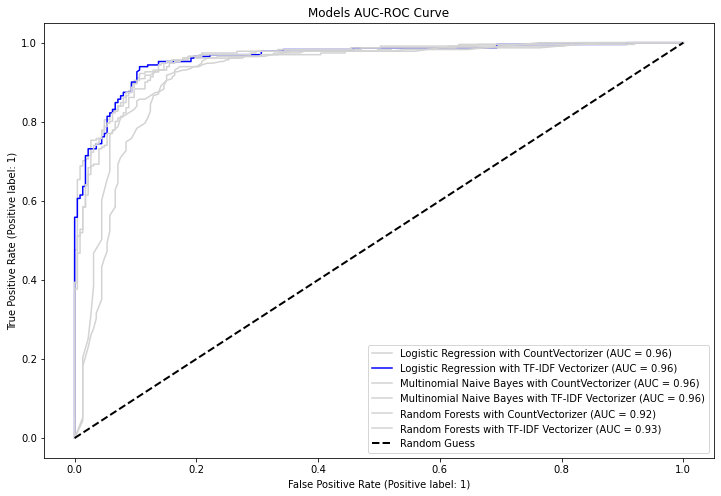

In [3778]:
# Plot AUC-ROC Curve

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
plot_roc_curve(logreg_cvec_gs, X_test, y_test, ax = ax, name = 'Logistic Regression with CountVectorizer', color='lightgrey')
plot_roc_curve(logreg_tvec_gs, X_test, y_test, ax = ax, name = 'Logistic Regression with TF-IDF Vectorizer', color='blue')
plot_roc_curve(nb_cvec_gs, X_test, y_test, ax = ax, name = 'Multinomial Naive Bayes with CountVectorizer', color='lightgrey')
plot_roc_curve(nb_tvec_gs, X_test, y_test, ax = ax, name = 'Multinomial Naive Bayes with TF-IDF Vectorizer', color='lightgrey')
plot_roc_curve(rf_cvec, X_test, y_test, ax = ax, name = 'Random Forests with CountVectorizer', color='lightgrey')
plot_roc_curve(rf_tvec, X_test, y_test, ax = ax, name = 'Random Forests with TF-IDF Vectorizer', color='lightgrey')
plt.plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('Models AUC-ROC Curve')
plt.savefig('../image/Models AUC-ROC Curve.png')
plt.legend()
plt.show()

<b>Observation<b/> : 
    
1. Based on the above summary table, after hyperparamter tuning all our model is still overfitting as indicated by the gap between test and train scores.
2. Even though all our model R2 accuracy and F1-score is only a marginal difference. Logistic Regression with TF-IDF Vectorizer model returned the highest R2 accuracy and F1-score. Our model able to accurately predict 91.0% of test data based on our text features and lesser overfit.
3. AUC-ROC curve is another evaluation metric for binary classification problems. It is a probability curve that plots the True Positive Rate (TPR) against False Positive Rate (FPR) at various threshold values. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. Based on AUC-ROC curve, all models are same! However, Logistic Regression with TF-IDF Vectorizer model outperforming most of the models at most decision thresholds, apart from the start of the curve and the end of the curve. 
4. Thus, Logistic Regression with TF-IDF Vectorizer model is choose as our production model.

## 5. Final Model Insights

### 5.1 Coefficients

In [3779]:
# Get the best pipeline of our production model - Logistic Regression with TF-IDF Vectorizer 

logreg_tvec_gs.best_estimator_

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.8, max_features=2000, min_df=2,
                                 stop_words='english')),
                ('logreg', LogisticRegression(C=1, random_state=42))])

In [3780]:
# Create a coefs dataframe to store our production model coefficient & feature names

coefs = pd.DataFrame(logreg_tvec_gs.best_estimator_.steps[1][1].coef_).T
coefs.columns = ['coef']
coefs['feature'] = logreg_tvec_gs.best_estimator_.steps[0][1].get_feature_names()

# Rearrange the columns
coefs = coefs[['feature','coef']]

# Sort the coefs dataframe by coef in descending order
coefs.sort_values(by = 'coef', ascending = False, inplace = True)

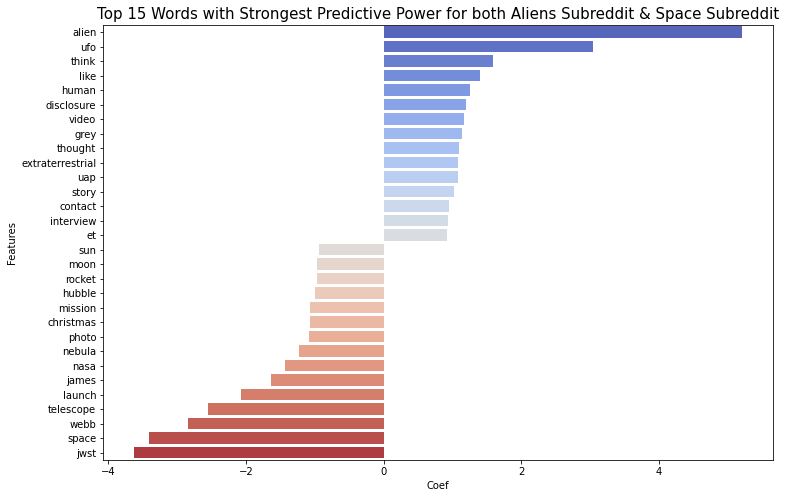

In [3781]:
# Plot bar chart of top 15 words with strongest predictive power for both subreddit in our production model - Logistic Regression with TF-IDF Vectorizer 

plt.figure(figsize = (12, 8))
sns.barplot(data = pd.concat([coefs.head(15), coefs.tail(15)]), x = 'coef', y = 'feature', palette='coolwarm')
plt.ylabel('Features')
plt.xlabel('Coef')
plt.title('Top 15 Words with Strongest Predictive Power for both Aliens Subreddit & Space Subreddit', size = 15)
plt.savefig('../image/Top 15 Words with Strongest Predictive Power for both Aliens Subreddit & Space Subreddit.png')
plt.show()

<b>Observation<b/> : 
    
1. Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1 (<mark style="background-color: lightgrey">r/aliens</mark>), whereas the negative scores indicate a feature that predicts class 0 (<mark style="background-color: lightgrey">r/space</mark>). Feature Importance refers to techniques that calculate a score for all the input features for a given model. The scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

2. We can see that the top 5 words with strongest predictive power for <mark style="background-color: lightgrey">r/aliens</mark> are :
    - alien
    - ufo
    - think 
    - like
    - human

3. Whereas for <mark style="background-color: lightgrey">r/space</mark>, the top 5 words with strongest predictive power are :
    - jwst
    - space
    - webb
    - telescope
    - launch

### 5.2 Class Probabilities

In [3782]:
# Create a predictions dataframe to store our production model prediction probability of our X_test

predictions = pd.DataFrame(logreg_tvec_gs.predict_proba(X_test), index = X_test.index)
predictions['content_token_lemma'] = X_test
predictions.columns = ['space','aliens', 'content_token_lemma']

In [3783]:
# Display the top 10 predictions sorted by aliens probability in descending order 

predictions.sort_values('aliens', ascending = False).head(10)

,space,aliens,content_token_lemma
25,0.005130,0.994870,how to find alien dyson sphere
242,0.005130,0.994870,why can t we find alien
593,0.005130,0.994870,alien or tribal artifact
632,0.017418,0.982582,grey alien are not actually alien
507,0.026776,0.973224,what s the point even if a full fledged alien walked up to one of you and said he wa an alien you probably wouldn t believe it amp x b alien i m an alien human yeah right dude i know you got in some freak accident that left you looking messed up and you re just trying to mess with me alien my people come from the proxima centauri star system human and you re drinking well that might be how you got in the accident i m done amp x b is their really even a point to any of this what would an alien have to do to prove to some of you it is an alien let me know if you want thank you
46,0.031833,0.968167,have you ever had an alien encounter or a ufo sighting
33,0.032940,0.967060,have you ever seen an alien biological extraterrestrial not alien ship but alien being i m very interested in anectodal experience and i believe in ets
74,0.033687,0.966313,do you guy think alien can cure genetic disorder do you guy think alien have the capability to cure genetic disorder ha anyone heard of the capability to do this
546,0.043013,0.956987,ufo disrupts the village idyll
204,0.043013,0.956987,marina popovich and ufo in the soviet union


<b>Observation<b/> : 
    
1. We can see that our model has a pretty good grasp on typical <mark style="background-color: lightgrey">r/aliens</mark> posts here. Posts that include mention of alien or ufo are strongly predicted as <mark style="background-color: lightgrey">r/aliens</mark> posts.

In [3784]:
# Display the top 10 predictions sorted by space probability in descending order 

predictions.sort_values('space', ascending = False).head(10)

,space,aliens,content_token_lemma
1244,0.993805,0.006195,nasa james webb space telescope lift off from south america
1329,0.989898,0.010102,james webb space telescope launch official nasa broadcast
1252,0.988949,0.011051,highlight from the james webb space telescope s long awaited launch the new york time here are highlight from the james webb space telescope launch video
1155,0.988460,0.011540,james webb space telescope s orbit
1435,0.988291,0.011709,the hubble space telescope in orbit since and their successor the james webb telescope
1318,0.987082,0.012918,the james webb space telescope is on it s way
1277,0.979802,0.020198,james webb space telescope launch timeline
880,0.979175,0.020825,james webb space telescope an astronomer on the team explains how to send a giant telescope to space and why
1270,0.978324,0.021676,nasa s billion james webb space telescope launch on epic mission to study early universe
1328,0.975627,0.024373,james webb space telescope ha successfully launched into orbit


<b>Observation<b/> : 
    
1. We see that strongly predicted <mark style="background-color: lightgrey">r/space</mark> posts are posts that involve mention of the James Webb Space Telescope. This suggests that discussion of James Webb Space Telescope issues are largely absent from <mark style="background-color: lightgrey">r/aliens</mark>. We can probably assume that both subreddit doesn't have a particularly intersectional topic.

### 5.3 Predictions on Test Data

In [3785]:
# Get the predictions of our X_test and add to predictions dataframe
# Add the actual results to predictions dataframe

predictions['preds'] = logreg_tvec_gs.predict(X_test)
predictions['actual'] = y_test

# Rearrange the columns
predictions = predictions[['aliens', 'space', 'preds', 'actual', 'content_token_lemma']]

In [3786]:
# Check the first 5 rows of predictions dataframe

predictions.head()

,aliens,space,preds,actual,content_token_lemma
446,0.739878,0.260122,1,1,are there any creditable account description of the internals of an alien ship i d love to read about the technology layout or any info i can get my hand on about the internals of a ship
1044,0.573166,0.426834,1,0,how did they discover quasar in the s
97,0.638998,0.361002,1,1,where can i watch full thing even if it s fake
183,0.729228,0.270772,1,1,the structure on the moon are a covering or field structure or craft and alien below snd on the surface
1010,0.362322,0.637678,0,0,study give a new perspective on why our planet ha managed to stay habitable for billion of year concluding it is almost certainly due at least in part to luck the research suggests this may shorten the odds of finding life on so called twin earth in the universe


In [3787]:
# Filter predictions dataframe where predictions not equal to actual

wrong_predictions = predictions[predictions['preds'] != predictions['actual']]

In [3788]:
# False positive - posts that wrongly classifies as space subreddit

wrong_predictions[wrong_predictions['preds'] == 0]

,aliens,space,preds,actual,content_token_lemma
182,0.042028,0.957972,0,1,james webb telescope launch countdown
336,0.448139,0.551861,0,1,what is the ultimate goal of any advanced civilization the goal is to become a level and beyond type civilization to turn the universe into nothing more than a sandbox literally unimaginable technology anything you can think of in your head will be primitive to this civilization moving star the power of god performing miracle everything in star trek creating other universe turning a galaxy into a giant computer immortality etc this is our goal this is every living being s goal in the universe so what s after that after we ve usurped god after we ve conquered all knowledge after we can travel outside of space and time what s after that it won t take that long for u to do it once the singularity happens so what s next
691,0.274305,0.725695,0,1,nasa the moon and ancient architecture dr jason reza jorjani
235,0.376465,0.623535,0,1,my christmas gift to myself came a few day early
52,0.413595,0.586405,0,1,if we build it they will come
117,0.483503,0.516497,0,1,ever seen venus do this watch rite side on cross the morph the dr
167,0.354897,0.645103,0,1,this this shirt i got for christmas merry christmas fellow truth seeker
165,0.379958,0.620042,0,1,do alien exist the key mystery that could be unlocked after the james webb telescope launched world news
38,0.436503,0.563497,0,1,kic tabby s star
638,0.154145,0.845855,0,1,what is that official nasa moon photo


In [3789]:
# False negative - posts that wrongly classifies as aliens subreddit

wrong_predictions[wrong_predictions['preds'] == 1]

,aliens,space,preds,actual,content_token_lemma
1044,0.573166,0.426834,1,0,how did they discover quasar in the s
832,0.506787,0.493213,1,0,buy trustpilot review safe non drop star positive review
1434,0.709951,0.290049,1,0,look a fast a you can intelligent life part
1061,0.634881,0.365119,1,0,ign there s a weird cube on the moon ign
969,0.514068,0.485932,1,0,well that aged poorly
1444,0.566674,0.433326,1,0,looking through nvg this star is bright but appears blurry why
1319,0.546015,0.453985,1,0,i can t believe i am now reading wa launched instead of will a true next generation telescope ad astra
1323,0.651494,0.348506,1,0,we start another story for humanity
1324,0.665371,0.334629,1,0,guy another story unfolding itself
1484,0.624798,0.375202,1,0,can anyone help identifying what this project wa


## 6. Conclusion

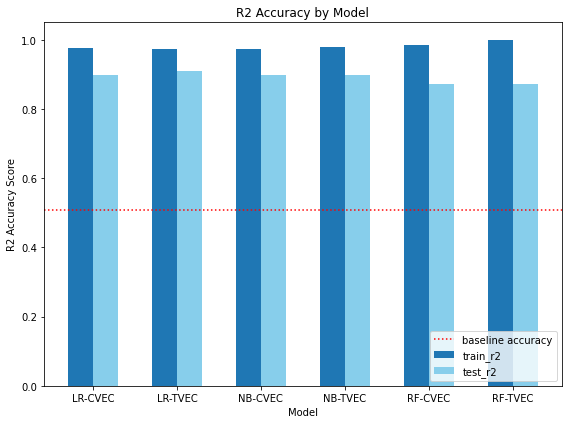

In [3790]:
# Plot R2 comparison by Model & Train/Test Data

labels = ['LR-CVEC', 'LR-TVEC', 'NB-CVEC', 'NB-TVEC', 'RF-CVEC', 'RF-TVEC']

train_r2 = [logreg_cvec_gs.score(X_train, y_train), 
            logreg_tvec_gs.score(X_train, y_train), 
            nb_cvec_gs.score(X_train, y_train), 
            nb_tvec_gs.score(X_train, y_train),
            rf_cvec.score(X_train, y_train), 
            rf_tvec.score(X_train, y_train),]

test_r2 = [logreg_cvec_gs.score(X_test, y_test), 
           logreg_tvec_gs.score(X_test, y_test), 
           nb_cvec_gs.score(X_test, y_test), 
           nb_tvec_gs.score(X_test, y_test),
            rf_cvec.score(X_test, y_test), 
            rf_tvec.score(X_test, y_test),]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x - width/2, train_r2, width, label='train_r2')
ax.bar(x + width/2, test_r2, width, label='test_r2', color='skyblue')

# Set the y-label, x-axis tick label & title .
ax.set_ylabel('R2 Accuracy Score')
ax.set_xlabel('Model')
ax.set_title('R2 Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.axhline(y = 0.507, linestyle='dotted', color='red', label='baseline accuracy')

# Set the legend location
ax.legend(loc = "lower right")
fig.tight_layout()


|Model|Vectorizer|Train Score|Test Score|F1_score|AUC|Remarks|
|---|---|---|---|---|---|---|
|LogisticRegression(random_state=42)|CountVectorizer(stop_words='english')|0.9774|0.8991|0.8996|0.96|With Hyperparameter Tuning| 
|LogisticRegression(random_state=42)|TfidfVectorizer(stop_words='english')|0.9718|0.9101|0.914|0.96|With Hyperparameter Tuning|
|MultinomialNB()|CountVectorizer(stop_words='english')|0.9718|0.8969|0.9011|0.96|With Hyperparameter Tuning|
|MultinomialNB()|TfidfVectorizer(stop_words='english')|0.9793|0.8969|0.9006|0.96|With Hyperparameter Tuning|
|RandomForestClassifier(random_state=42)|CountVectorizer(stop_words='english')|1.0|0.8728|0.8835|0.96|Without Hyperparameter Tuning|
|RandomForestClassifier(random_state=42)|TfidfVectorizer(stop_words='english')|1.0|0.8728|0.8835|0.96|Without Hyperparameter Tuning|

As we can see, all the models R2 accuracy (87.2% ~ 91%) and F1-score (88.3% ~ 91.4%) are fairly similar but still predicts much better than our baseline score(50.6%). All the models are very good at distinguishing between the <mark style="background-color: lightgrey">r/aliens</mark> (positive class) and <mark style="background-color: lightgrey">r/space</mark> (negative class) with AUC score equal to 0.96. This shows that <mark style="background-color: lightgrey">r/aliens</mark> and <mark style="background-color: lightgrey">r/space</mark> really do just talk about very different, distinct things. Overall, Logistic Regression with TF-IDF Vectorizer produces the highest accuracy results and least amount of misclassification among other models. After careful consideration and judgement, we decided to choose Logistic Regression with TF-IDF Vectorizer model as our production model because:

- It is easier to implement and interpret. 
- The model coefficients can be easily interpreted as indicators of feature importance. The model is using the coefficients of each word in the post and calculates the odds of it belonging to <mark style="background-color: lightgrey">r/aliens</mark> or belong to <mark style="background-color: lightgrey">r/space</mark>.

Even though, Random Forests reduces overfitting in decision trees and helps to improve the accuracy. The major limitation of Random Forests is it requires much computational power as well as resources as it builds numerous trees to combine their outputs. It also requires much time for training as it combines a lot of decision trees to determine the class. Last but not least, due to the ensemble of decision trees, it suffers interpretability and fails to determine the significance of each variable.

## 7. Recommendations

Based on our model, the key words that best differentiates posts related from <mark style="background-color: lightgrey">r/aliens</mark> to <mark style="background-color: lightgrey">r/space</mark> are:

The top 5 words with the highest odd for <mark style="background-color: lightgrey">r/aliens</mark>:
- alien
- ufo
- think 
- like
- human

The top 5 words with the highest odd for <mark style="background-color: lightgrey">r/space</mark>:
- jwst
- space
- webb
- telescope
- launch

The more the above listed words appear in a posts, the better the model to differentiates posts related to <mark style="background-color: lightgrey">r/aliens</mark> from <mark style="background-color: lightgrey">r/space</mark>. The current trend in <mark style="background-color: lightgrey">r/aliens</mark> is talking about general extraterrestrial life that may exist in the universe outside of Earth. Whereas for <mark style="background-color: lightgrey">r/space</mark>, the latest topic is about James Webb Space Telescope which is a space telescope and an international collaboration among NASA, the European Space Agency, and the Canadian Space Agency which launch on 25th December 2021.

## 8. Limitations & Improvement

As demonstrated by the false predictions above, our model does have some limitations, especially when it comes to predicting <mark style="background-color: lightgrey">r/aliens</mark> posts. Mentioning James Webb Space Telescope or NASA throws off our model, even though it could potentially be an issue pertinent to <mark style="background-color: lightgrey">r/aliens</mark>. Last but not least, limited computational power also unable us to try a more complex algorithm to improve our models as complex algorithm takes a longer time to train the data.  

Areas for improvement and future exploration:
1. Use word similarities (e.g. word2vec) to classify posts instead of frequency.
2. Try Support Vector Machine algorithm for classification.
3. Explore relationship between post content, number of comments, and upvote ratio.
4. Implement sentiment analysis such as positive and negative Comment.
5. Develop set of StopWords for the model.

## 9. References

1. https://www.upgrad.com/blog/multinomial-naive-bayes-explained/
2. https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/
3. https://www.upgrad.com/blog/multinomial-naive-bayes-explained/
4. https://www.mygreatlearning.com/blog/random-forest-algorithm/
5. https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
6. https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba
7. https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1?gi=171712960afd